# 第7章 偏相関


---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_07/Colaboratory/Lesson_07.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_07/Colaboratory/Lesson_07.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

この章では，最低気温との間にもアイスコーヒーの売上個数のデータと相関関係があるのかを調べます。


## 事前準備

In [1]:
# matplotlibの日本語化
!pip install japanize-matplotlib

# pandas matplotlibのライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# アイスコーヒーの売上データをダウンロードをダウンロード
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_07/Sample_Data/sales_iced_coffee.csv -O ./sales_iced_coffee.csv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=442712a4dfb72a724b8dc7d64716b7b5c7cf97248ecc81c817d3f9db64f9bddd
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
--2024-10-21 13:24:00--  https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_07/Sample_Data/sales_iced_coffee.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306 [text/plain]
Saving to: ‘./sales_iced_coffee.csv’

./sales_iced_coffee 100%[===================>]     306  --.-KB/s

## 散布図
アイスコーヒーの売上個数と最低気温との散布図

In [2]:
sales_iced_coffee = pd.read_csv("./sales_iced_coffee.csv")

with pd.option_context('display.max_rows',6):
    print(sales_iced_coffee)

    最高気温  最低気温(X)  売上個数(Y)
0   38.5     28.8      354
1   38.0     29.3      355
2   37.6     26.5      346
..   ...      ...      ...
15  38.3     28.3      360
16  37.6     26.9      323
17  37.7     28.2      319

[18 rows x 3 columns]


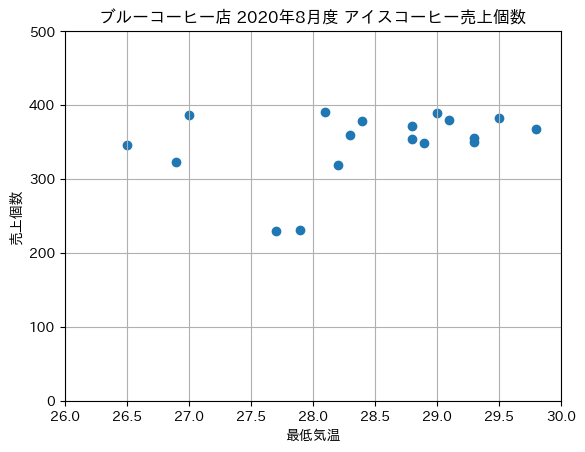

In [3]:
plt.scatter(sales_iced_coffee['最低気温(X)'], sales_iced_coffee['売上個数(Y)'])
plt.title('ブルーコーヒー店 2020年8月度 アイスコーヒー売上個数')
plt.xlabel('最低気温')
plt.ylabel('売上個数')
plt.xlim([26, 30])
plt.ylim([0,500])
plt.grid()
plt.show()


## 最低気温$X$と売上個数$Y$の相関係数$\rho_{XY}$




In [4]:
diff_x = []
diff_y = []

# 偏差xを求める
for tmp in sales_iced_coffee['最低気温(X)']:
  diff_x.append(tmp - sales_iced_coffee['最低気温(X)'].mean())

# 偏差yを求める
for tmp in sales_iced_coffee['売上個数(Y)']:
  diff_y.append(tmp - sales_iced_coffee['売上個数(Y)'].mean())

# 偏差積を求める
m_xy = list(map(lambda x, y: x * y, diff_x, diff_y))

# 偏差積の平均を求める
m_xy_mean = sum(m_xy)/len(m_xy)

# 相関係数を求める
r_xy = m_xy_mean/sales_iced_coffee['最低気温(X)'].std(ddof=0)/sales_iced_coffee['売上個数(Y)'].std(ddof=0)
print('最低気温(X)と売上個数(Y)の相関係数', r_xy)

最低気温(X)と売上個数(Y)の相関係数 0.3343580090683689


## 最高気温$Z$と売上個数$Y$の相関係数$\rho_{YZ}$



In [5]:
diff_z = []

# 偏差zを求める
for tmp in sales_iced_coffee['最高気温']:
  diff_z.append(tmp - sales_iced_coffee['最高気温'].mean())

# 偏差積を求める
m_yz = list(map(lambda z, y: z * y, diff_z, diff_y))

# 偏差積の平均を求める
m_yz_mean = sum(m_yz)/len(m_yz)

# 相関係数を求める
r_yz = m_yz_mean/sales_iced_coffee['最高気温'].std(ddof=0)/sales_iced_coffee['売上個数(Y)'].std(ddof=0)
print('最高気温(Z)と売上個数(Y)の相関係数', r_yz)

最高気温(Z)と売上個数(Y)の相関係数 0.9146158088736411


## 最高気温$Z$と最低気温$X$の相関係数$\rho_{ZX}$






In [6]:
# 偏差積を求める
m_zx = list(map(lambda x, z: x * z, diff_x, diff_z))

# 偏差積の平均を求める
m_zx_mean = sum(m_zx)/len(m_zx)

# 相関係数を求める
r_zx = m_zx_mean/sales_iced_coffee['最高気温'].std(ddof=0)/sales_iced_coffee['最低気温(X)'].std(ddof=0)
print('最高気温(Z)と最低気温(X)の相関係数', r_zx)

最高気温(Z)と最低気温(X)の相関係数 0.34010263405046315


## 偏相関係数

説明変数が2以上あるとき，注目する変数$x_i$以外のすべての変数を固定したときの$x_i$と$y_i$の相関係数のことです。

一般に偏相関係数$\rho_{ij, rest}$と書きます。ここで$rest$は，値を固定する変数のことです。

例えば，最高気温$Z$の影響を除外した編相関係数$\rho_{XY, Z}$は以下の式で求めることができます。

$$
\rho_{XY, Z}
= \frac{\rho_{XY} - \rho_{ZX} \rho_{YZ}}
{  \sqrt{1 - \rho_{YZ}^2} \sqrt{1 - \rho_{ZX}^2} }
$$


## 最高気温$Z$の影響を除外した最低気温$X$と売上個数$X$の偏相関係数$\rho_{XY,Z}$

In [7]:
r_xy_z = (r_xy - r_zx * r_yz)/((1 - r_yz**2)**0.5 * (1 - r_zx**2)**0.5)
print('最低気温(X)と売上個数(Y)の偏相関係数', r_xy_z)

最低気温(X)と売上個数(Y)の偏相関係数 0.06126628121607625


In [8]:
r_yz_x = (r_yz - r_xy * r_zx)/((1 - r_zx**2)**0.5 * (1 - r_xy**2)**0.5)
print('最高気温(Z)と売上個数(Y)の偏相関係数', r_yz_x)

最高気温(Z)と売上個数(Y)の偏相関係数 0.903679440736654


In [9]:
r_zx_y = (r_zx - r_xy * r_yz)/((1 - r_xy**2)**0.5 * (1 - r_yz**2)**0.5)
print('最高気温(Z)と最低気温(Z)の偏相関係数', r_zx_y)

最高気温(Z)と最低気温(Z)の偏相関係数 0.08999655483879691


## ※偏相関係数を計算する自作関数
pandasには偏相関係数を求めるメソッドが用意されていないので，行列を使った偏相関係数をもとめる関数を用意し，試してみる。

In [10]:
def pd_partial_corr(df):
  # df の相関行列を計算する
  corr_matrix = df.corr()
  # 相関行列の逆行列を計算する
  corr_matrix_inv = np.linalg.inv(corr_matrix)
  # 相関行列の逆行列の対角要素の平方根の逆数を対角要素とする行列 D を作成する
  D = np.diag(np.power(np.diag(corr_matrix_inv), -0.5))
  # 偏相関行列を計算する
  df_pcorr = -np.dot(np.dot(D, corr_matrix_inv), D) + 2 * np.eye(corr_matrix.shape[0])
  # DataFrameに詰め直す
  return pd.DataFrame(
      df_pcorr,
      columns = corr_matrix.columns,
      index = corr_matrix.index
  )

pd_partial_corr( sales_iced_coffee)

,最高気温,最低気温(X),売上個数(Y)
最高気温,1.000000,0.089997,0.903679
最低気温(X),0.089997,1.000000,0.061266
売上個数(Y),0.903679,0.061266,1.000000
